In [0]:
from google.colab import files
files.upload()

Saving mushrooms.csv to mushrooms (7).csv


{'mushrooms.csv': b'class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat\np,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m\np,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u\ne,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g\ne,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m\ne,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m\np,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g\ne,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g\ne,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m\ne,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g\np,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u\ne,x,f,n,f,n,f,w,b,n,t

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
from sklearn.ensemble import*

In [0]:
data=pd.read_csv('mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [0]:
#Total number of nulls
sum(data.isnull().sum())

0

In [0]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [0]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [0]:
#Only one unique value in veil type, so its not useful for prediction purpose. We will remove it.
data1=data.drop(['veil-type'],axis=1)
data1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,w,o,e,w,v,l


In [0]:
data1.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [0]:
#Checking for duplicate values
print('Total values',len(data1))
print('Duplicate values',len(data1)-len(data1.drop_duplicates()))

Total values 8124
Duplicate values 0


In [0]:
data1.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


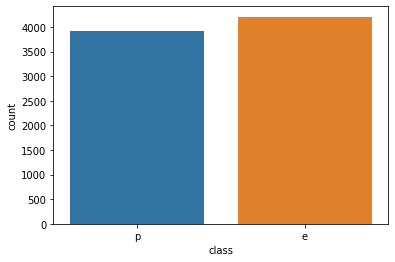

In [0]:
# Distribution of mushroom class
#plt.figure(figsize=(6,6))
sns.countplot('class',data=data1)

In [0]:
data2=data1

In [0]:
#Replacing all the single letter variable values with their full names
data2['cap-shape']=data2['cap-shape'].replace({'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'})
data2['cap-surface']=data2['cap-surface'].replace({'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'})
data2['cap-color']=data2['cap-color'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green' ,'p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
data2['bruises']=data2['bruises'].replace({'t':'bruises', 'f':'no bruises'})
data2['odor']=data2['odor'].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'})
data2['gill-attachment']=data2['gill-attachment'].replace({'a':'attached','d':'descending','f':'free','n':'notched'})
data2['gill-spacing']=data2['gill-spacing'].replace({'c':'close','w':'crowded','d':'distant'})
data2['gill-size']=data2['gill-size'].replace({'b':'broad','n':'narrow'})
data2['gill-color']=data2['gill-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'})
data2['stalk-shape']=data2['stalk-shape'].replace({'e':'enlarging','t':'tapering'})
data2['stalk-root']=data2['stalk-root'].replace({'b':'bulbous','c':'club','u':'cup' ,'e':'equal','z':'rhizomorphs' ,'r':'rooted','m':'missing' })
data2['stalk-surface-above-ring']=data2['stalk-surface-above-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
data2['stalk-surface-below-ring']=data2['stalk-surface-below-ring'].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'})
data2['stalk-color-above-ring']=data2['stalk-color-above-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})
data2['stalk-color-below-ring']=data2['stalk-color-below-ring'].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','o':'orange','p':'pink','e':'red','w':'white','y':'yellow'})
data2['veil-color']=data2['veil-color'].replace({'n':'brown','o':'orange','w':'white','y':'yellow'})
data2['ring-number']=data2['ring-number'].replace({'n':'none','o':'one','t':'two'})
data2['ring-type']=data2['ring-type'].replace({'c':'cobwebby','e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant','s':'sheathing','z':'zone'})
data2['spore-print-color']=data2['spore-print-color'].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','r':'green','o':'orange','u':'purple','w':'white','y':'yellow'})
data2['population']=data2['population'].replace({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'})
data2['habitat']=data2['habitat'].replace({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'})
data2['class']=data2['class'].replace({'e':'edible','p':'poisonous'})

# BIVARIATE ANALYSIS

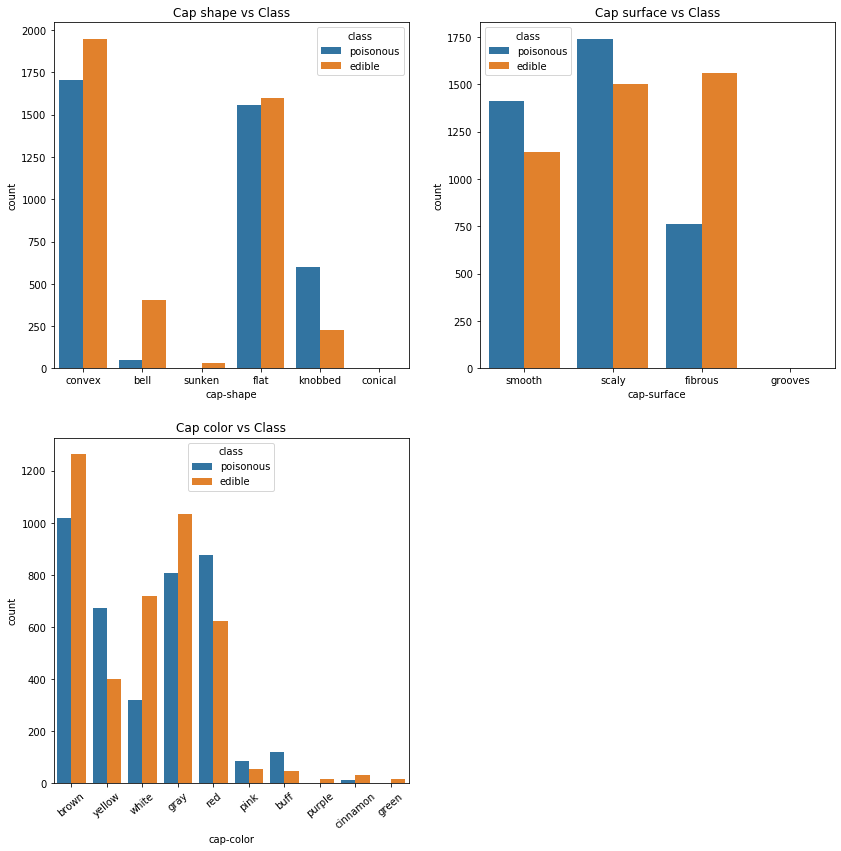

<Figure size 432x288 with 0 Axes>

In [0]:
#Cap features
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
sns.countplot(x='cap-shape',hue='class',data=data2)
plt.title('Cap shape vs Class')
plt.subplot(2,2,2)
sns.countplot(x='cap-surface',hue='class',data=data2,)
plt.title('Cap surface vs Class')
plt.xticks(rotation=0)
plt.subplot(2,2,3)
sns.countplot(x='cap-color',hue='class',data=data2)
plt.xticks(rotation=40)
plt.title('Cap color vs Class')
plt.show()
plt.subplots_adjust(hspace=0.3)

In [0]:
#) mushroom with sunken cap shape is edible (but the number of data points is less).
#2) Cap surface doesnt give much idea about the data2room class.
#3) Purple and green cap color mushrooms are edible (less data points).1

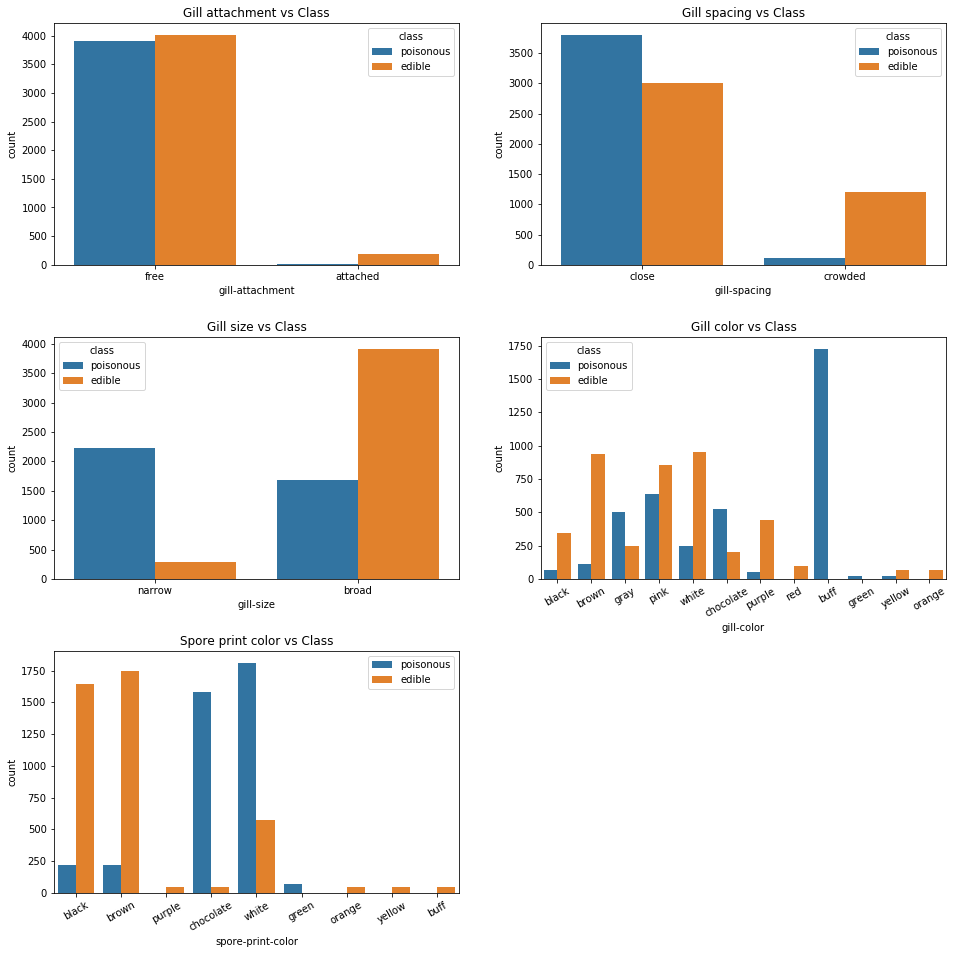

In [0]:
# Gill features
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.title('Gill attachment vs Class')
sns.countplot(x='gill-attachment',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,2)
plt.title('Gill spacing vs Class')
sns.countplot(x='gill-spacing',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,3)
plt.title('Gill size vs Class')
sns.countplot(x='gill-size',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,4)
plt.title('Gill color vs Class')
sns.countplot(x='gill-color',hue='class',data=data2,)
plt.xticks(rotation=30)
plt.subplot(3,2,5)
plt.title('Spore print color vs Class')
sns.countplot(x='spore-print-color',hue='class',data=data2)
plt.legend(loc='upper right')
plt.xticks(rotation=30)
plt.subplots_adjust(hspace=0.3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

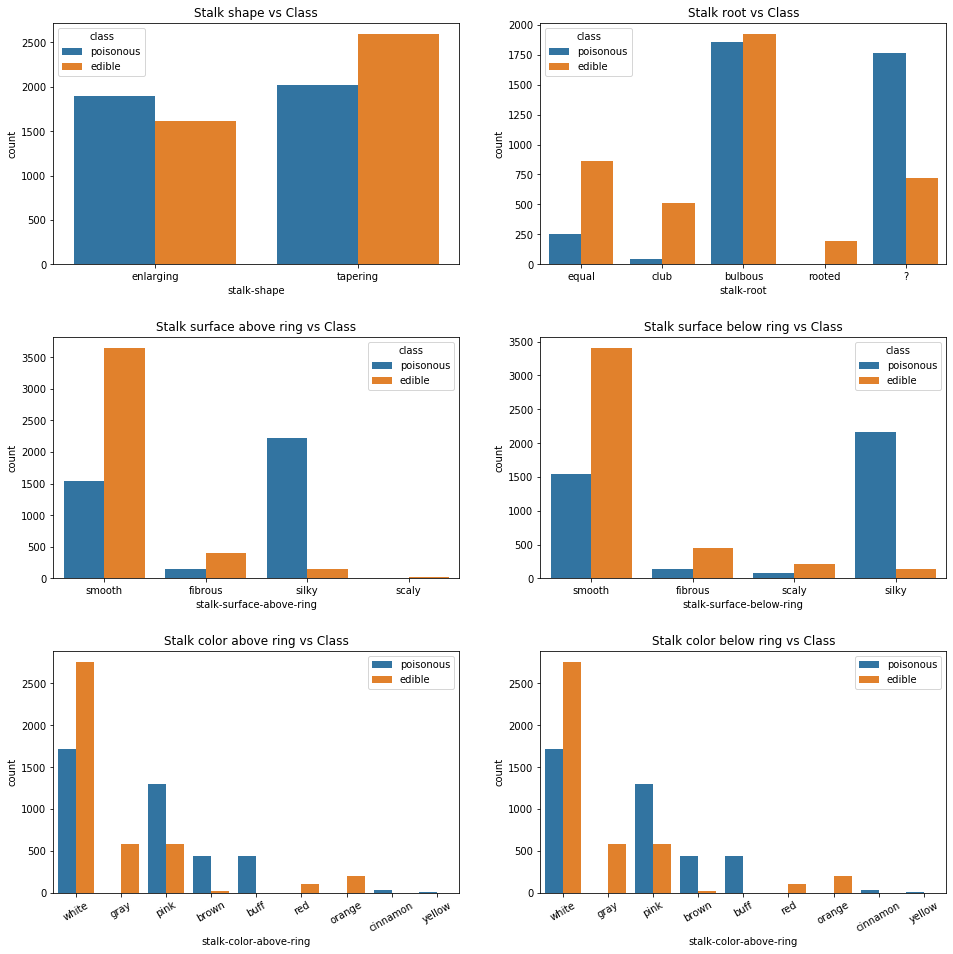

In [0]:
#Stalk features
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
plt.title('Stalk shape vs Class')
sns.countplot(x='stalk-shape',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,2)
plt.title('Stalk root vs Class')
sns.countplot(x='stalk-root',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,3)
plt.title('Stalk surface above ring vs Class')
sns.countplot(x='stalk-surface-above-ring',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,4)
plt.title('Stalk surface below ring vs Class')
sns.countplot(x='stalk-surface-below-ring',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(3,2,5)
plt.title('Stalk color above ring vs Class')
sns.countplot(x='stalk-color-above-ring',hue='class',data=data2)
plt.legend(loc='upper right')
plt.xticks(rotation=30)
plt.subplot(3,2,6)
plt.title('Stalk color below ring vs Class')
sns.countplot(x='stalk-color-above-ring',hue='class',data=data2)
plt.legend(loc='upper right')
plt.subplots_adjust(hspace=0.3)
plt.xticks(rotation=30)

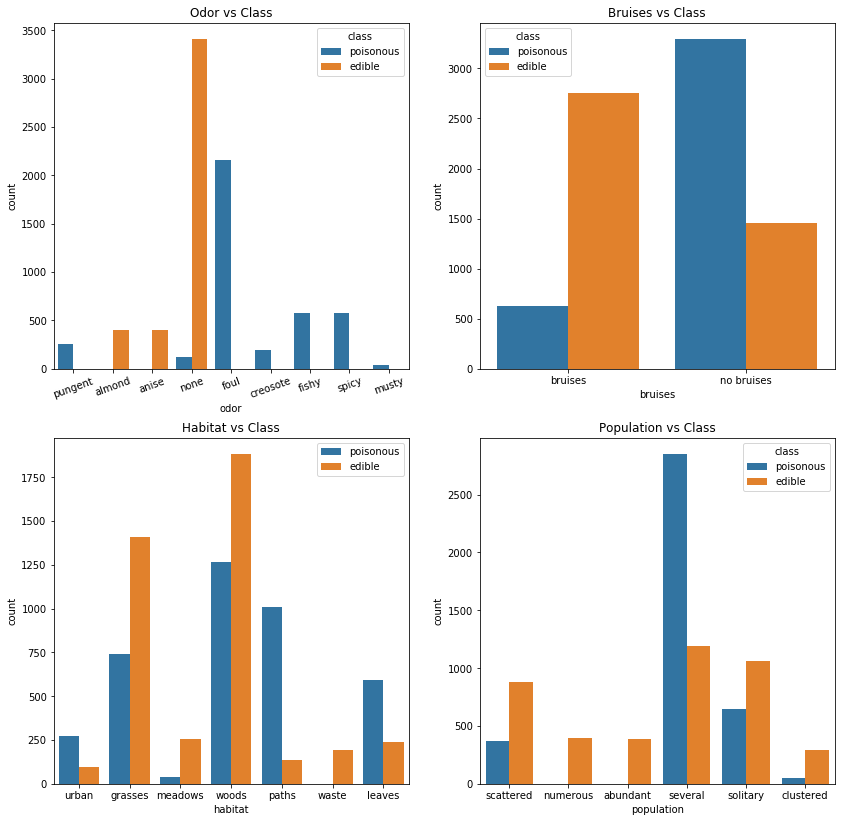

In [0]:
#Miscellaneous features
plt.figure(figsize=(14,14))
plt.subplot(2,2,1)
plt.title('Odor vs Class')
sns.countplot(x='odor',hue='class',data=data2,)
plt.xticks(rotation=20)
plt.subplot(2,2,2)
plt.title('Bruises vs Class')
sns.countplot(x='bruises',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplot(2,2,3)
plt.title("Habitat vs Class")
sns.countplot(x='habitat',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.subplot(2,2,4)
plt.title("Population vs Class")
sns.countplot(x='population',hue='class',data=data2,)
plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.2)
plt.show()

In [0]:
import scipy.stats

In [0]:
props=list(data2.columns)
props.remove('class')
pval=[]
chi=[]
for i in props:
    ct=pd.crosstab(data2[i],columns=data2['class'])
    chi2, p, ddof, expected = scipy.stats.chi2_contingency(ct)
    pval.append(p)
    chi.append(chi2)
chisq1=pd.DataFrame()
chisq1['Properties']=props
chisq1['P value']=pval
chisq1['Chi Square value']=chi
chisq1.sort_values('Chi Square value',ascending=False)

,Properties,P value,Chi Square value
4,odor,0.000000e+00,7659.726740
18,spore-print-color,0.000000e+00,4602.033170
8,gill-color,0.000000e+00,3765.714086
17,ring-type,0.000000e+00,2956.619278
11,stalk-surface-above-ring,0.000000e+00,2808.286287
12,stalk-surface-below-ring,0.000000e+00,2684.474076
7,gill-size,0.000000e+00,2366.834257
13,stalk-color-above-ring,0.000000e+00,2237.898496
14,stalk-color-below-ring,0.000000e+00,2152.390891
3,bruises,0.000000e+00,2041.415647
